In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
subs = pd.read_excel("Submissions.xlsx")
subs.head()

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,SubmissionsPublicNotes,ReviewPriority
0,4,19.0,ORIG,1,AP,1969-07-16,NaN,UNKNOWN
1,4,3.0,SUPPL,10,AP,1980-05-08,NaN,NaN
2,4,3.0,SUPPL,11,AP,1987-05-26,NaN,NaN
3,159,NaN,ORIG,1,AP,1939-03-09,NaN,NaN
4,159,3.0,SUPPL,3,AP,1986-12-09,NaN,NaN


In [3]:
len(subs)

160748

In [4]:
subs.shape

(160748, 8)

In [5]:
subs_orig = subs[subs['SubmissionType']=='ORIG']
subs_orig.head()

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,SubmissionsPublicNotes,ReviewPriority
0,4,19.0,ORIG,1,AP,1969-07-16,NaN,UNKNOWN
3,159,NaN,ORIG,1,AP,1939-03-09,NaN,NaN
6,415,NaN,ORIG,1,AP,1939-02-27,NaN,NaN
7,552,19.0,ORIG,1,AP,1939-02-09,NaN,UNKNOWN
23,654,19.0,ORIG,1,AP,1939-05-04,NaN,UNKNOWN


In [6]:
len(subs_orig)

21943

In [7]:
type(subs_orig['SubmissionStatusDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
date_start = '2010-01-01'
date_end = '2019-12-31'

mask = (subs_orig['SubmissionStatusDate'] >= date_start) & (subs_orig['SubmissionStatusDate'] <= date_end)

In [9]:
subs_2010s = subs_orig.loc[mask]
subs_2010s.head()

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,SubmissionsPublicNotes,ReviewPriority
44128,19962,9.0,ORIG,41,AP,2010-03-19,NaN,STANDARD
46250,20167,19.0,ORIG,1,AP,2014-12-19,NaN,UNKNOWN
53240,20772,7.0,ORIG,11,AP,2010-12-09,NaN,PRIORITY
57942,21201,7.0,ORIG,1,AP,2010-03-30,NaN,STANDARD
58065,21217,12.0,ORIG,1,AP,2010-03-01,NaN,STANDARD


In [10]:
len(subs_2010s)

7841

In [11]:
subs_2010s.SubmissionStatus.unique()

array(['AP', 'TA'], dtype=object)

In [12]:
subs_2010s.ApplNo.nunique()

7719

In [13]:
# several application numbers are still listed more than once 
# probably for different SubmissionClassCodeID

In [14]:
subs_2010s_TA = subs_2010s['SubmissionStatus'] == 'TA'
len(subs_2010s[subs_2010s_TA])

699

In [15]:
subs_2010s.SubmissionStatusDate.min()

Timestamp('2010-01-04 00:00:00')

In [16]:
subs_2010s.SubmissionStatusDate.max()

Timestamp('2019-12-30 00:00:00')

In [17]:
nonfirst = subs_2010s['SubmissionNo'] > 1
len(subs_2010s[nonfirst])

125

In [18]:
# just the non-first submission nos do not account for the difference in unique ApplNo

In [19]:
subs_2010s_counts = subs_2010s.groupby(['SubmissionType', 'SubmissionStatus']).size()
subs_2010s_counts

SubmissionType  SubmissionStatus
ORIG            AP                  7142
                TA                   699
dtype: int64

In [25]:
# I want to narrow down to just New Molecular Entity or New Combination
# Based on the lookup table, Type 1 (NME) ClassCodeID is 7
# Type 1/4 (NME and new combination) ClassCodeID is 8 -- I will ignore these for now

#mask2 = (subs_2010s['SubmissionClassCodeID'] == 7) | (subs_2010s['SubmissionClassCodeID'] == 8)
mask2 = subs_2010s['SubmissionClassCodeID'] == 7
subs_2010s_NME = subs_2010s.loc[mask2]
subs_2010s_NME.head()

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,SubmissionsPublicNotes,ReviewPriority
53240,20772,7.0,ORIG,11,AP,2010-12-09,NaN,PRIORITY
57942,21201,7.0,ORIG,1,AP,2010-03-30,NaN,STANDARD
62194,21746,7.0,ORIG,1,AP,2012-03-06,NaN,STANDARD
62685,21825,7.0,ORIG,1,AP,2011-10-14,NaN,STANDARD
63054,21883,7.0,ORIG,1,AP,2014-05-23,NaN,PRIORITY


In [26]:
len(subs_2010s_NME)

357

In [27]:
subs_2010s_NME.ApplNo.nunique()

357

In [28]:
subs_2010s_NME.ReviewPriority.unique()

array(['PRIORITY', 'STANDARD'], dtype=object)

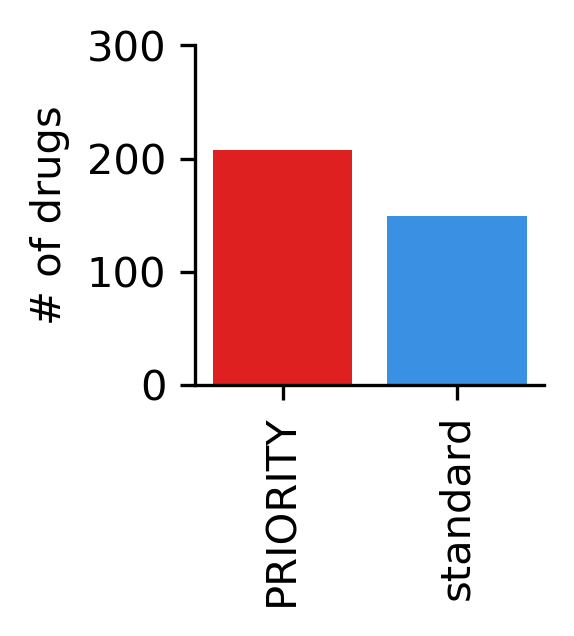

In [30]:
palette={'PRIORITY':'red', 'STANDARD':'dodgerblue'}

# I want to know the counts of drugs that were under priority vs. standard
ax = plt.subplots(figsize=(1.5,1.5), dpi=300)
ax = sns.countplot(x='ReviewPriority', data=subs_2010s_NME, palette=palette)
ax.set_yticks([0,100,200,300])
ax.tick_params(labelsize=10)
ax.set_xlabel('')
ax.set_ylabel('# of drugs')
ax.set_xticklabels((['PRIORITY', 'standard']), rotation=90)
sns.despine()
plt.savefig('2010s_NME_Priorities.png', bbox_inches='tight')

In [84]:
# FOLLOW UP QUESTIONS (these will require data from elsewhere)
# how many of these drugs have patents?
# how many of these drugs have "trade secrets" instead of patents?
# need to talk to Samik more about this
# when will these patents expire?
# what diseases do these drugs treat?
# how many people are affected by these diseases?
# identify major therapeutic areas that have seen a lot of new drugs
# e.g. cardiometabolic diseases (heart disease, hypertension, diabetes, fatty liver) 
# vs. cancer (huge field, I know)
# vs. neurodegenerative diseases
# vs. rare diseases, etc.
# how much did these drugs cost (in the US, without insurance) the first year they were approved
# how much do these drugs cost now (January 2020)?

In [85]:
# Next step with the current data from Drugs@FDA
# I'm focusing on drugs that were
# (1) approved in 2010-2019
# (2) New Molecular Entities (Type 1)
# There are 357 unique ApplNos

# Need to get

# From "Products", columns:
# Match by ApplNo
# Form (e.g. injectable vs tablet vs other route of administration)
# Reference Drug (these should all be 0 if we're working with NMEs, right?)
# DrugName
# ActiveIngredient

# From "Applications", columns:
# Match by ApplNo
# ApplType
# SponsorName



In [31]:
# Let's do the simpler stuff first
# Get the ApplType and SponsorName from "Applications"

apps = pd.read_excel('Applications.xlsx')
apps.head()

,ApplNo,ApplType,ApplPublicNotes,SponsorName
0,4,NDA,NaN,PHARMICS
1,159,NDA,NaN,LILLY
2,552,NDA,NaN,ORGANON USA INC
3,734,NDA,NaN,LILLY
4,793,NDA,NaN,MYLAN SPECIALITY LP


In [32]:
len(apps)

23719

In [33]:
f1 = list(subs_2010s_NME['ApplNo'])
len(f1)

357

In [34]:
mask3 = apps.ApplNo.isin(f1)

In [35]:
apps_2010s = apps[mask3]

In [36]:
apps_2010s.head()

,ApplNo,ApplType,ApplPublicNotes,SponsorName
2865,20772,NDA,NaN,QOL MEDCL
3160,21201,NDA,NaN,CHEMISCH FBRK KRSSLR
3528,21746,NDA,NaN,WINDTREE THERAP
3575,21825,NDA,NaN,APOPHARMA INC
3615,21883,NDA,NaN,ALLERGAN


In [37]:
len(apps_2010s)

357

In [38]:
merge1 = pd.merge(subs_2010s_NME, apps_2010s, on='ApplNo')
merge1.head()

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,SubmissionsPublicNotes,ReviewPriority,ApplType,ApplPublicNotes,SponsorName
0,20772,7.0,ORIG,11,AP,2010-12-09,NaN,PRIORITY,NDA,NaN,QOL MEDCL
1,21201,7.0,ORIG,1,AP,2010-03-30,NaN,STANDARD,NDA,NaN,CHEMISCH FBRK KRSSLR
2,21746,7.0,ORIG,1,AP,2012-03-06,NaN,STANDARD,NDA,NaN,WINDTREE THERAP
3,21825,7.0,ORIG,1,AP,2011-10-14,NaN,STANDARD,NDA,NaN,APOPHARMA INC
4,21883,7.0,ORIG,1,AP,2014-05-23,NaN,PRIORITY,NDA,NaN,ALLERGAN


In [39]:
merge1.pop('SubmissionsPublicNotes')
merge1.pop('ApplPublicNotes')

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
352   NaN
353   NaN
354   NaN
355   NaN
356   NaN
Name: ApplPublicNotes, Length: 357, dtype: float64

In [40]:
merge1.shape

(357, 9)

In [41]:
merge1.head()

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority,ApplType,SponsorName
0,20772,7.0,ORIG,11,AP,2010-12-09,PRIORITY,NDA,QOL MEDCL
1,21201,7.0,ORIG,1,AP,2010-03-30,STANDARD,NDA,CHEMISCH FBRK KRSSLR
2,21746,7.0,ORIG,1,AP,2012-03-06,STANDARD,NDA,WINDTREE THERAP
3,21825,7.0,ORIG,1,AP,2011-10-14,STANDARD,NDA,APOPHARMA INC
4,21883,7.0,ORIG,1,AP,2014-05-23,PRIORITY,NDA,ALLERGAN


In [42]:
merge1.SponsorName.nunique()

220

In [43]:
merge1.ApplType.unique()

array(['NDA', 'BLA'], dtype=object)

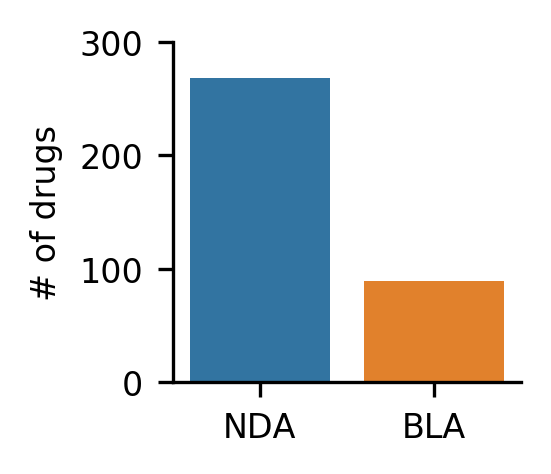

In [45]:
ax = plt.subplots(figsize=(1.5,1.5), dpi=300)
ax = sns.countplot(x='ApplType', data=merge1)
ax.set_yticks([0,100,200,300])
ax.tick_params(labelsize=8)
ax.set_xlabel('')
ax.set_ylabel('# of drugs', fontsize=8)
sns.despine()

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, fontsize=6)
plt.savefig('2010s_Codes7_NDAvBLA.png', bbox_inches='tight')

In [46]:
# the problem with the different sponsor name
# is that some of them merge together overtime
# so I'm not sure how to account for those
# would need to look at each company and see if they're a subsidiary or later on they merge with a larger company

# in the meantime, let's just group by sponsor name (imperfect, I know)
# and list anyone whose count is 2 or more

companies = merge1.groupby('SponsorName').count()[['ApplNo']]
companies.head()

,ApplNo
SponsorName,
AAA USA INC,2
ABBVIE INC,4
ABLYNX NV,1
ACADIA PHARMS INC,1
ACORDA,1


In [47]:
companies.sort_values(by='ApplNo', ascending=False)

,ApplNo
SponsorName,
NOVARTIS,11
ELI LILLY AND CO,8
GENENTECH INC,7
BOEHRINGER INGELHEIM,7
ALLERGAN,7
...,...
GLOBAL BLOOD THERAPS,1
GUERBET,1
GW RES LTD,1


In [48]:
companies_2 = companies[companies['ApplNo']>1]
companies_2.head()

,ApplNo
SponsorName,
AAA USA INC,2
ABBVIE INC,4
ACTELION PHARMS LTD,2
AEGERION,2
ALEXION PHARM,3


In [49]:
len(companies_2)

59

In [50]:
companies_2 = companies_2.sort_values(by='ApplNo', ascending=False)
companies_2.head(20)

,ApplNo
SponsorName,
NOVARTIS,11
ELI LILLY AND CO,8
BOEHRINGER INGELHEIM,7
GENENTECH INC,7
ALLERGAN,7
ASTRAZENECA PHARMS,6
JANSSEN BIOTECH,6
GENENTECH,6
EISAI INC,5


In [122]:
# notice how there's NOVARTIS and NOVARTIS PHARMS CORP
# maybe the way I can get around this
# and maybe i can collapse them?
# I also need to figure out how to deal with companies that are separate in an older year but are merged later

In [51]:
sum(companies_2['ApplNo']>3)

19

In [52]:
# in the 2010s, 21 companies had 4 or more NMEs approved
companies_3 = companies[companies['ApplNo']>=3].reset_index()
companies_3.shape

(29, 2)

In [53]:
companies_3.head()

,SponsorName,ApplNo
0,ABBVIE INC,4
1,ALEXION PHARM,3
2,ALLERGAN,7
3,AMGEN INC,4
4,ASTELLAS,4


In [54]:
# this is imperfect since I haven't collapsed the companies that might be duplicates yet,
# but still, this is ok for a first pass
# let's call these super productive companies

companies_super = list(companies_3['SponsorName'])
len(companies_super)

29

In [55]:
print(companies_super)

['ABBVIE INC', 'ALEXION PHARM', 'ALLERGAN', 'AMGEN INC', 'ASTELLAS', 'ASTRAZENECA AB', 'ASTRAZENECA PHARMS', 'BAYER HEALTHCARE', 'BAYER HLTHCARE', 'BIOMARIN PHARM', 'BOEHRINGER INGELHEIM', 'BRISTOL MYERS SQUIBB', 'EISAI INC', 'ELI LILLY AND CO', 'GENENTECH', 'GENENTECH INC', 'JANSSEN BIOTECH', 'JANSSEN PRODS', 'MERCK SHARP DOHME', 'NOVARTIS', 'NOVARTIS PHARMS CORP', 'NOVO', 'PF PRISM CV', 'PFIZER INC', 'REGENERON PHARMACEUTICALS', 'SANOFI AVENTIS US', 'SUNOVION PHARMS INC', 'TAKEDA PHARMS USA', 'VERTEX PHARMS INC']


In [130]:
# follow-up questions to these super productive companies
# how big are they (employee size)
# could you figure out how big (employee size) their R&D budget and/or staff are?
# what was their stock price on the 1st day of 2010
# what was their stock price on the last day of 2019
# it's probably not trivial to figure out how much they spend on marketing/advertising the drugs
# the company profits and CEO pay is public, though
# what about the board of directors?
# people fuss about the CEO a lot, but isn't the CEO appointed by the board?
# wouldn't we also want to know about the board members?

In [59]:
# ok let's do a first pass on the Products now
# we want drugs that were
# approved between 2010 and 2019
# NMEs
# made by one of the super productive companies

prods = pd.read_excel('Products.xlsx')
prods.head()

,ApplNo,ProductNo,Form,Strength,ReferenceDrug,DrugName,ActiveIngredient,ReferenceStandard
0,4,4,SOLUTION/DROPS;OPHTHALMIC,0.01,0,PAREDRINE,HYDROXYAMPHETAMINE HYDROBROMIDE,0.0
1,159,1,TABLET;ORAL,500MG,0,SULFAPYRIDINE,SULFAPYRIDINE,0.0
2,552,1,INJECTABLE;INJECTION,"20,000 UNITS/ML",0,LIQUAEMIN SODIUM,HEPARIN SODIUM,0.0
3,552,2,INJECTABLE;INJECTION,"40,000 UNITS/ML",0,LIQUAEMIN SODIUM,HEPARIN SODIUM,0.0
4,552,3,INJECTABLE;INJECTION,"5,000 UNITS/ML",0,LIQUAEMIN SODIUM,HEPARIN SODIUM,0.0


In [60]:
# I realize I need to make another table
# from merge1, narrow down the table so that it only has drugs from the super productive companies

mask4 = merge1.SponsorName.isin(companies_super)

merge2 = merge1.loc[mask4]
merge2.head()

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority,ApplType,SponsorName
4,21883,7.0,ORIG,1,AP,2014-05-23,PRIORITY,NDA,ALLERGAN
6,22134,7.0,ORIG,1,AP,2010-07-28,STANDARD,NDA,ALLERGAN
10,22271,7.0,ORIG,1,AP,2013-01-25,STANDARD,NDA,TAKEDA PHARMS USA
13,22383,7.0,ORIG,1,AP,2011-07-01,STANDARD,NDA,SUNOVION PHARMS INC
18,22416,7.0,ORIG,1,AP,2013-11-08,STANDARD,NDA,SUNOVION PHARMS INC


In [61]:
len(merge2)

136

In [62]:
merge2.SponsorName.nunique() #sanity check

29

In [63]:
f2 = list(merge2['ApplNo'])
len(f2)

136

In [136]:
# I just realized that the super companies, as their names imply
# account for a major chunk (160/386) of NMEs approved
# while all other small companies 
# would be interesting to see if the smaller companies were acquired by one of the bigger ones later on

In [64]:
mask5 = prods.ApplNo.isin(f2)
prods2 = prods.loc[mask5]
prods2.head()

,ApplNo,ProductNo,Form,Strength,ReferenceDrug,DrugName,ActiveIngredient,ReferenceStandard
7100,21883,1,POWDER;INTRAVENOUS,EQ 500MG BASE/VIAL,1,DALVANCE,DALBAVANCIN HYDROCHLORIDE,1.0
7423,22134,1,SOLUTION/DROPS;OPHTHALMIC,0.0025,1,LASTACAFT,ALCAFTADINE,1.0
7576,22271,1,TABLET;ORAL,EQ 6.25MG BASE,1,NESINA,ALOGLIPTIN BENZOATE,0.0
7577,22271,2,TABLET;ORAL,EQ 12.5MG BASE,1,NESINA,ALOGLIPTIN BENZOATE,0.0
7578,22271,3,TABLET;ORAL,EQ 25MG BASE,1,NESINA,ALOGLIPTIN BENZOATE,1.0


In [65]:
len(prods2)

258

In [66]:
prods2.ApplNo.nunique()

136

In [67]:
# there are 160 unique ApplNo, but there can be more than 1 ProductNo
prods2.ProductNo.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [68]:
# the different products refer to different strengths/doses of the drug
prods2.DrugName.nunique() #another sanity check

136

In [69]:
# OK good
# we can now make a merge3

merge3 = pd.merge(merge2, prods2, on='ApplNo')
merge3.head()

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority,ApplType,SponsorName,ProductNo,Form,Strength,ReferenceDrug,DrugName,ActiveIngredient,ReferenceStandard
0,21883,7.0,ORIG,1,AP,2014-05-23,PRIORITY,NDA,ALLERGAN,1,POWDER;INTRAVENOUS,EQ 500MG BASE/VIAL,1,DALVANCE,DALBAVANCIN HYDROCHLORIDE,1.0
1,22134,7.0,ORIG,1,AP,2010-07-28,STANDARD,NDA,ALLERGAN,1,SOLUTION/DROPS;OPHTHALMIC,0.0025,1,LASTACAFT,ALCAFTADINE,1.0
2,22271,7.0,ORIG,1,AP,2013-01-25,STANDARD,NDA,TAKEDA PHARMS USA,1,TABLET;ORAL,EQ 6.25MG BASE,1,NESINA,ALOGLIPTIN BENZOATE,0.0
3,22271,7.0,ORIG,1,AP,2013-01-25,STANDARD,NDA,TAKEDA PHARMS USA,2,TABLET;ORAL,EQ 12.5MG BASE,1,NESINA,ALOGLIPTIN BENZOATE,0.0
4,22271,7.0,ORIG,1,AP,2013-01-25,STANDARD,NDA,TAKEDA PHARMS USA,3,TABLET;ORAL,EQ 25MG BASE,1,NESINA,ALOGLIPTIN BENZOATE,1.0


In [70]:
len(merge3)

258

In [71]:
# whoops. I forgot to get rid of the duplicates.
merge3 = merge3[merge3['ProductNo']==1]
merge3.shape

(136, 16)

In [72]:
# right now, I don't care about the form, strength, reference drug
merge3.pop('Form')
merge3.pop('Strength')
merge3.pop('ReferenceDrug')
merge3.pop('ReferenceStandard')
merge3.head()

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority,ApplType,SponsorName,ProductNo,DrugName,ActiveIngredient
0,21883,7.0,ORIG,1,AP,2014-05-23,PRIORITY,NDA,ALLERGAN,1,DALVANCE,DALBAVANCIN HYDROCHLORIDE
1,22134,7.0,ORIG,1,AP,2010-07-28,STANDARD,NDA,ALLERGAN,1,LASTACAFT,ALCAFTADINE
2,22271,7.0,ORIG,1,AP,2013-01-25,STANDARD,NDA,TAKEDA PHARMS USA,1,NESINA,ALOGLIPTIN BENZOATE
5,22383,7.0,ORIG,1,AP,2011-07-01,STANDARD,NDA,SUNOVION PHARMS INC,1,ARCAPTA NEOHALER,INDACATEROL MALEATE
6,22416,7.0,ORIG,1,AP,2013-11-08,STANDARD,NDA,SUNOVION PHARMS INC,1,APTIOM,ESLICARBAZEPINE ACETATE


In [73]:
merge3.SubmissionType.unique()

array(['ORIG'], dtype=object)

In [74]:
merge3.SubmissionNo.unique()

array([1, 2])

In [75]:
merge3.shape

(136, 12)

In [76]:
subno = merge3.groupby('SubmissionNo').count()[['ApplNo']]
subno

,ApplNo
SubmissionNo,
1,135
2,1


In [77]:
x = merge3.loc[merge3['SubmissionNo']==2]
x

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority,ApplType,SponsorName,ProductNo,DrugName,ActiveIngredient
172,207997,7.0,ORIG,2,AP,2017-04-28,PRIORITY,NDA,NOVARTIS,1,RYDAPT,MIDOSTAURIN


In [78]:
# I'm not sure why this has SubmissionNo 2, but I'll keep it for now, especially since it's not duplicated

In [79]:
y = merge3.loc[merge3['ApplNo']==207997]
y

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority,ApplType,SponsorName,ProductNo,DrugName,ActiveIngredient
172,207997,7.0,ORIG,2,AP,2017-04-28,PRIORITY,NDA,NOVARTIS,1,RYDAPT,MIDOSTAURIN


In [80]:
# yup. gonna move on for now.
merge3.head()

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority,ApplType,SponsorName,ProductNo,DrugName,ActiveIngredient
0,21883,7.0,ORIG,1,AP,2014-05-23,PRIORITY,NDA,ALLERGAN,1,DALVANCE,DALBAVANCIN HYDROCHLORIDE
1,22134,7.0,ORIG,1,AP,2010-07-28,STANDARD,NDA,ALLERGAN,1,LASTACAFT,ALCAFTADINE
2,22271,7.0,ORIG,1,AP,2013-01-25,STANDARD,NDA,TAKEDA PHARMS USA,1,NESINA,ALOGLIPTIN BENZOATE
5,22383,7.0,ORIG,1,AP,2011-07-01,STANDARD,NDA,SUNOVION PHARMS INC,1,ARCAPTA NEOHALER,INDACATEROL MALEATE
6,22416,7.0,ORIG,1,AP,2013-11-08,STANDARD,NDA,SUNOVION PHARMS INC,1,APTIOM,ESLICARBAZEPINE ACETATE


In [81]:
merge3.SubmissionStatus.unique()

array(['AP'], dtype=object)

In [82]:
merge3.ProductNo.unique()

array([1])

In [83]:
merge3.pop('SubmissionNo')
merge3.pop('SubmissionStatus')
merge3.pop('ProductNo')
merge3.shape

(136, 9)

In [84]:
merge3.head()

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionStatusDate,ReviewPriority,ApplType,SponsorName,DrugName,ActiveIngredient
0,21883,7.0,ORIG,2014-05-23,PRIORITY,NDA,ALLERGAN,DALVANCE,DALBAVANCIN HYDROCHLORIDE
1,22134,7.0,ORIG,2010-07-28,STANDARD,NDA,ALLERGAN,LASTACAFT,ALCAFTADINE
2,22271,7.0,ORIG,2013-01-25,STANDARD,NDA,TAKEDA PHARMS USA,NESINA,ALOGLIPTIN BENZOATE
5,22383,7.0,ORIG,2011-07-01,STANDARD,NDA,SUNOVION PHARMS INC,ARCAPTA NEOHALER,INDACATEROL MALEATE
6,22416,7.0,ORIG,2013-11-08,STANDARD,NDA,SUNOVION PHARMS INC,APTIOM,ESLICARBAZEPINE ACETATE


In [85]:
drugs = list(merge3['DrugName'])
drugs2 = list(merge3['ActiveIngredient'])
print("# of drugnames: ", len(drugs))
print("# of active ingredients: ", len(drugs2))

# of drugnames:  136
# of active ingredients:  136


In [86]:
# wonderful
# 136 to start is workable
# the next step is to figure out how to work with the Federal Reporter API
# and get the json files with information about
# funding given by which federal agency to which PI at which institution/company for what
# and then get the number of the grants
# then search pubmed for publications related to that grant
# and also search patent files that cite those papers that were funded by the grant

# to make my life easier for the next round, I'll save merge3 as a .csv

merge3.to_csv("drugs01_2010s_Type1_by_supercompanies.csv")